In [24]:
pip install pandas numpy

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file into a pandas DataFrame
file_path = "D:\\archive\\df_arabica_clean.csv"
df = pd.read_csv(file_path)

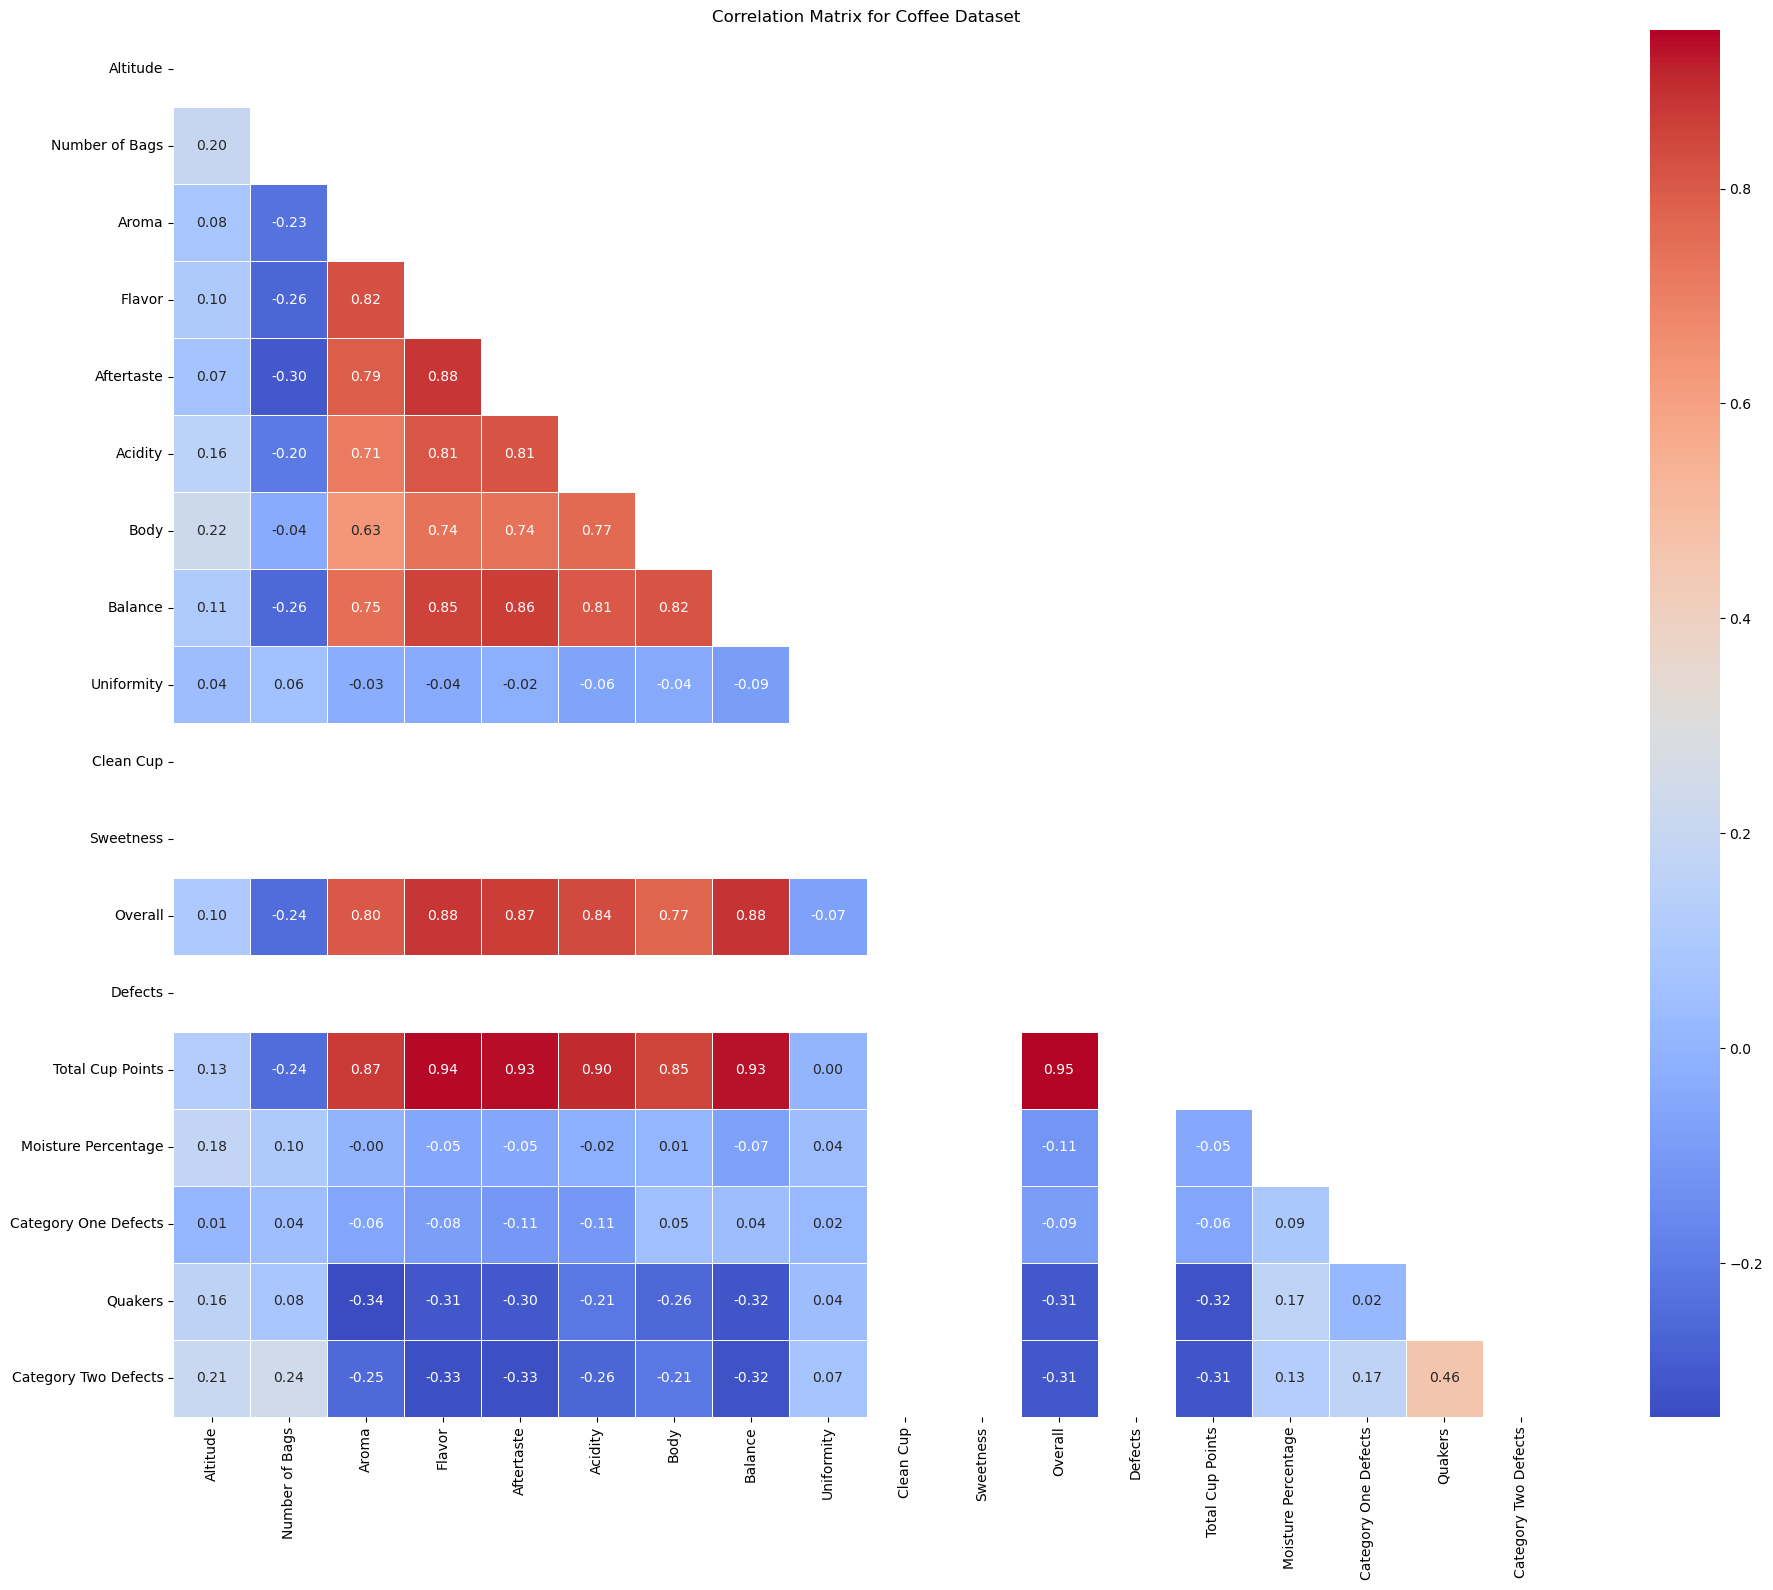

                      Altitude  Number of Bags     Aroma    Flavor  \
Altitude              1.000000        0.199688  0.076377  0.104812   
Number of Bags        0.199688        1.000000 -0.227414 -0.264700   
Aroma                 0.076377       -0.227414  1.000000  0.822779   
Flavor                0.104812       -0.264700  0.822779  1.000000   
Aftertaste            0.070321       -0.304697  0.793397  0.876811   
Acidity               0.156276       -0.204415  0.712920  0.810934   
Body                  0.224022       -0.040037  0.633101  0.739857   
Balance               0.108364       -0.259016  0.745648  0.851786   
Uniformity            0.038065        0.059370 -0.028063 -0.039767   
Clean Cup                  NaN             NaN       NaN       NaN   
Sweetness                  NaN             NaN       NaN       NaN   
Overall               0.096090       -0.243440  0.801765  0.877849   
Defects                    NaN             NaN       NaN       NaN   
Total Cup Points    

In [8]:
selected_features = [
    "Altitude", "Number of Bags", "Aroma", "Flavor", "Aftertaste", "Acidity",
    "Body", "Balance", "Uniformity", "Clean Cup", "Sweetness", "Overall",
    "Defects", "Total Cup Points", "Moisture Percentage", "Category One Defects",
    "Quakers", "Category Two Defects"
]

# Filter the DataFrame based on the selected features
df_selected = df[selected_features].copy()

# Handle 'Altitude' column
df_selected['Altitude'] = df_selected['Altitude'].apply(lambda x: pd.to_numeric(str(x).split('-')[0], errors='coerce'))

# Convert all columns to numeric, replacing non-numeric values with NaN
for col in df_selected.columns:
    df_selected[col] = pd.to_numeric(df_selected[col], errors='coerce')

# Calculate the correlation matrix using Pearson's correlation coefficient
correlation_matrix = df_selected.corr(method='pearson')

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a heatmap plot of the correlation matrix
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=True)
plt.title('Correlation Matrix for Coffee Dataset')
plt.tight_layout()
plt.show()

# Print the correlation matrix
print(correlation_matrix)
